In [2]:
import requests 
import pandas as pd 
import matplotlib.pyplot as plt

import os 
from dotenv import load_dotenv
load_dotenv()

True

# EIA Electricity Consumption Data (Historical)

In [ ]:
API_URL = "https://api.eia.gov/v2/electricity/retail-sales/data/"  
API_KEY = os.getenv("EIA_API_KEY")

# Parameters (example for NJ, Residential, 2001-01 to 2025-06)
PARAMS = {
    "api_key": API_KEY,
    "frequency": "monthly",
    "data[0]": "sales",
    "facets[stateid][]": "NJ",
    "facets[sectorid][]": "RES",
    "start": "2001-01",
    "end": "2025-06",
    "sort[0][column]": "period",
    "sort[0][direction]": "asc",
    "offset": 0,
    "length": 5000
}

response = requests.get(API_URL, params=PARAMS)
response

<Response [200]>

In [5]:
data = response.json()["response"]["data"]
df = pd.DataFrame(data)

In [6]:
df

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
0,2001-01,NJ,New Jersey,RES,residential,2337.54938,million kilowatt hours
1,2001-02,NJ,New Jersey,RES,residential,2014.65228,million kilowatt hours
2,2001-03,NJ,New Jersey,RES,residential,1968.49312,million kilowatt hours
3,2001-04,NJ,New Jersey,RES,residential,1739.08206,million kilowatt hours
4,2001-05,NJ,New Jersey,RES,residential,1677.70854,million kilowatt hours
...,...,...,...,...,...,...,...
289,2025-02,NJ,New Jersey,RES,residential,2241.1025,million kilowatt hours
290,2025-03,NJ,New Jersey,RES,residential,2020.35897,million kilowatt hours
291,2025-04,NJ,New Jersey,RES,residential,1791.92457,million kilowatt hours
292,2025-05,NJ,New Jersey,RES,residential,1901.98114,million kilowatt hours


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   period            294 non-null    object
 1   stateid           294 non-null    object
 2   stateDescription  294 non-null    object
 3   sectorid          294 non-null    object
 4   sectorName        294 non-null    object
 5   sales             294 non-null    object
 6   sales-units       294 non-null    object
dtypes: object(7)
memory usage: 16.2+ KB


In [50]:
df["sales"] = pd.to_numeric(df["sales"])
df["period"] = pd.to_datetime(df["period"])
df.set_index("period", inplace=True)

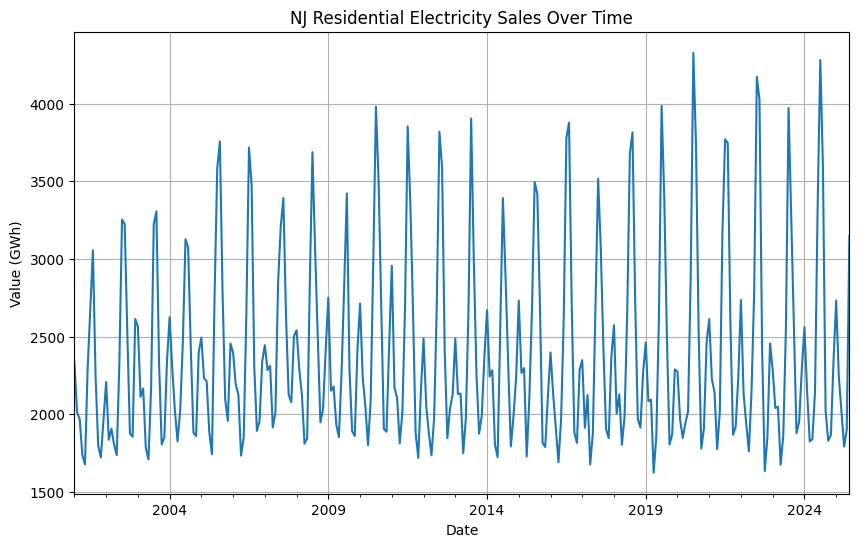

In [55]:
df["sales"].plot(figsize=(10, 6), title='NJ Residential Electricity Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value (GWh)')
plt.grid(True)
plt.show()

# EIA Electricity Consumption Data (Other checks)

In [11]:
API_URL = "https://api.eia.gov/v2/electricity/retail-sales/data/"  
API_KEY = os.getenv("EIA_API_KEY")

# Parameters (example for NJ, Residential, 2025-07)
PARAMS = {
    "api_key": API_KEY,
    "frequency": "monthly",
    "data[0]": "sales",
    "facets[stateid][]": "NJ",
    "facets[sectorid][]": "RES",
    "start": "2025-01",
    "end": "2025-07",
    "sort[0][column]": "period",
    "sort[0][direction]": "asc",
    "offset": 0,
    "length": 5000
}

response = requests.get(API_URL, params=PARAMS)
response

<Response [200]>

In [18]:
data = response.json()["response"]["data"]
df = pd.DataFrame(data)
df["sales"] = pd.to_numeric(df["sales"])
df["period"] = pd.to_datetime(df["period"])
df

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
0,2025-01-01,NJ,New Jersey,RES,residential,2731.90817,million kilowatt hours
1,2025-02-01,NJ,New Jersey,RES,residential,2241.10250,million kilowatt hours
2,2025-03-01,NJ,New Jersey,RES,residential,2020.35897,million kilowatt hours
3,2025-04-01,NJ,New Jersey,RES,residential,1791.92457,million kilowatt hours
4,2025-05-01,NJ,New Jersey,RES,residential,1901.98114,million kilowatt hours
5,2025-06-01,NJ,New Jersey,RES,residential,3148.66729,million kilowatt hours


In [19]:
latest_stored = df["period"].max()
latest_stored

Timestamp('2025-06-01 00:00:00')

In [20]:
from dateutil.relativedelta import relativedelta
(latest_stored + relativedelta(months=1)).strftime("%Y-%m")

'2025-07'

False